### <font color='red'> Health Insurance. </font>


![](https://m.foolcdn.com/media/dubs/original_images/Getty_-_insurance_life_car_home_family_protect_coverage.jpg)

#### Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

#### An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

#### For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

#### Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

#### Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

#### our data date has 381109 values and 12 columns, here we will use the "train.csv" database that has been made available for use , below you will see an analysis of the data, the processing of that data, class balancing, and the use of machine learning classification models to achieve our goal.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/health-insurance-cross-sell-prediction/sample_submission.csv
/kaggle/input/health-insurance-cross-sell-prediction/train.csv
/kaggle/input/health-insurance-cross-sell-prediction/test.csv


#### Importing Libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from yellowbrick.classifier import ConfusionMatrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV

## <font color='blue'> 1. Importing Dataset. </font>


#### Here we are reading the train database using the name "df" in the variable and using the name 'df_test' in the test database.

In [2]:
df = pd.read_csv('/kaggle/input/health-insurance-cross-sell-prediction/train.csv', sep = ',')
df_test = pd.read_csv('/kaggle/input/health-insurance-cross-sell-prediction/test.csv', sep = ',')
answer = pd.read_csv('/kaggle/input/health-insurance-cross-sell-prediction/sample_submission.csv', sep = ',')

#### After using the head function, we can see that this database don't have null values (using the info function we can confirm this), our target variable is "Response", we can also see that we have Numerical and Categoricals.

In [5]:
df.head(5)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [5]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [6]:
df.dtypes

id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

In [7]:
(df.isnull().sum()/len(df))

id                      0.0
Gender                  0.0
Age                     0.0
Driving_License         0.0
Region_Code             0.0
Previously_Insured      0.0
Vehicle_Age             0.0
Vehicle_Damage          0.0
Annual_Premium          0.0
Policy_Sales_Channel    0.0
Vintage                 0.0
Response                0.0
dtype: float64

## <font color='blue'> 2. Data Analysis. </font>


#### Verifying the correlation between our variables.

#### We can see that we don't have strong correlation between the variables.

<AxesSubplot:>

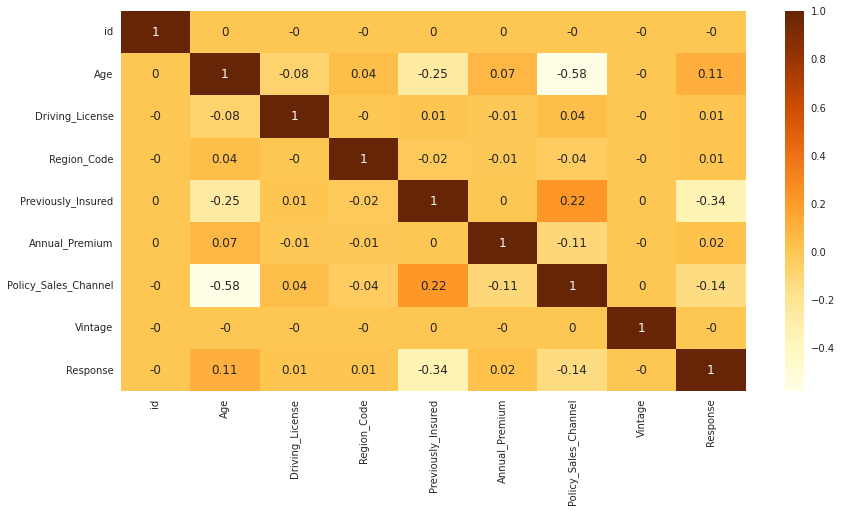

In [10]:
correlation = df.corr().round(2)
plt.figure(figsize = (14,7))
sns.heatmap(correlation, annot = True, cmap = 'YlOrBr')

#### Categorical Variables

#### Taking a look at our categorical variables, we can see that the base is well divided between men and women, all the data in our base have a driving license, looking at whether the customer has had insurance before, we have practically the same values, when we look at age of the car we practically only have new cars, looking at our target variable practically most of our customers would not like insurance.

<AxesSubplot:title={'center':'Variable Response'}, xlabel='Response', ylabel='count'>

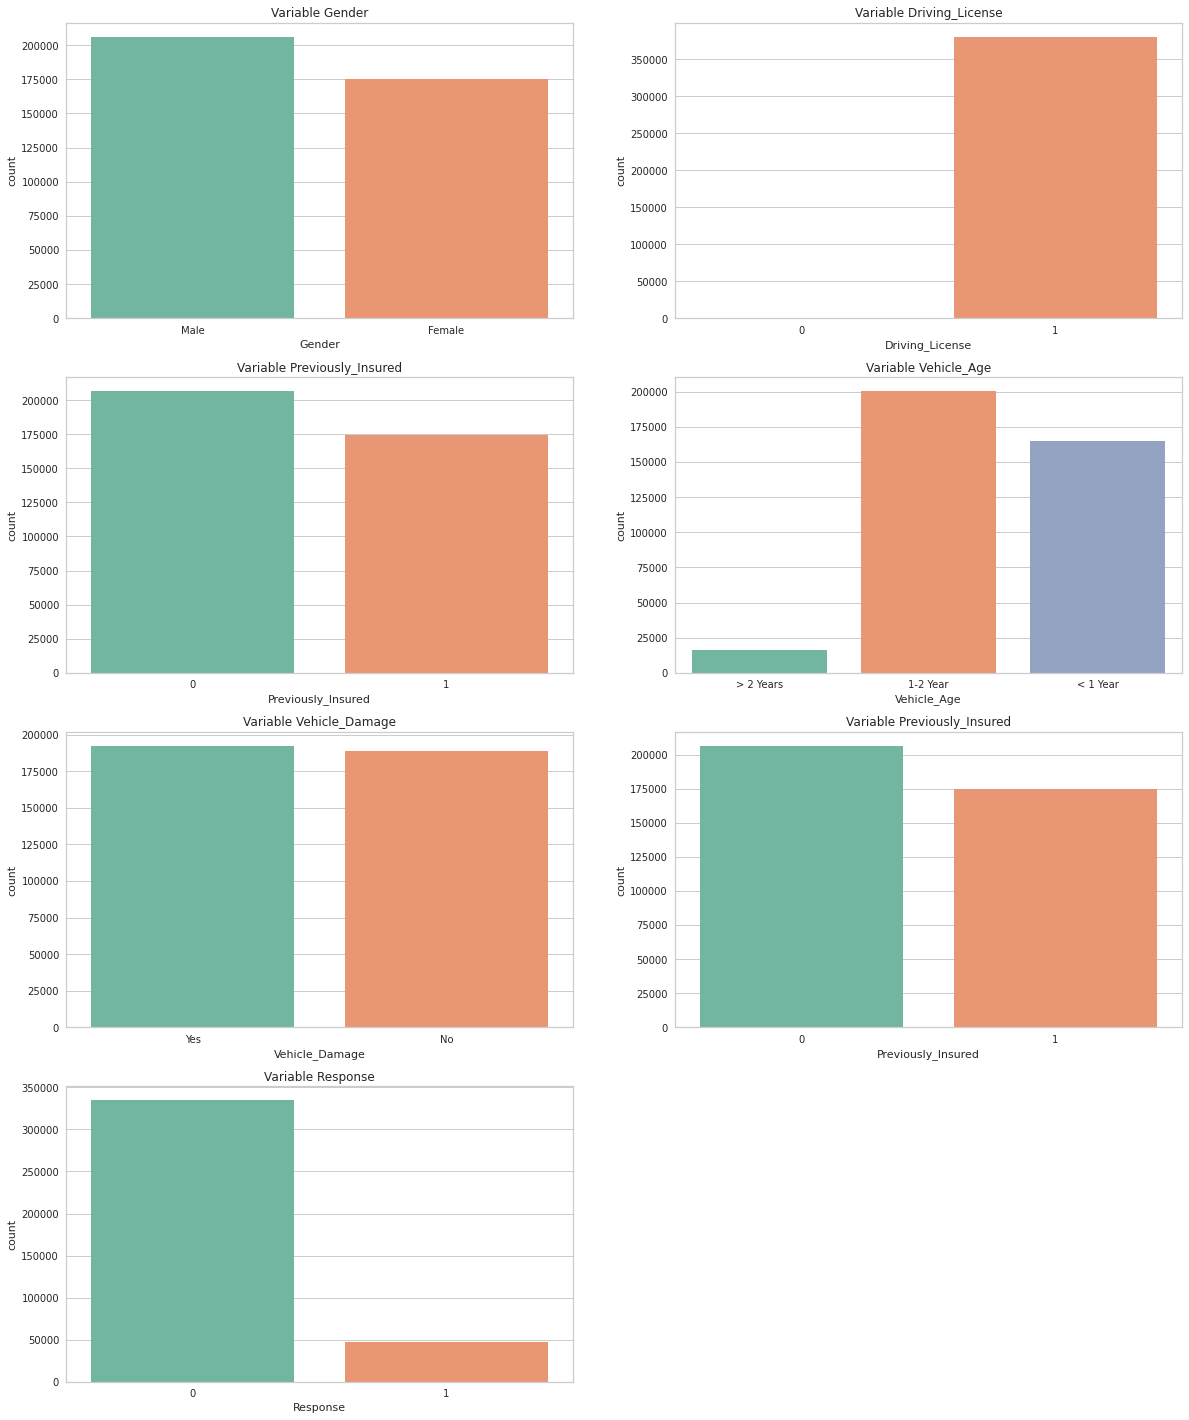

In [18]:
plt.figure(figsize = (20,25))

plt.subplot(4,2,1)
plt.gca().set_title('Variable Gender')
sns.countplot(x = 'Gender', palette = 'Set2', data = df)

plt.subplot(4,2,2)
plt.gca().set_title('Variable Driving_License')
sns.countplot(x = 'Driving_License', palette = 'Set2', data = df)

plt.subplot(4,2,3)
plt.gca().set_title('Variable Previously_Insured')
sns.countplot(x = 'Previously_Insured', palette = 'Set2', data = df)

plt.subplot(4,2,4)
plt.gca().set_title('Variable Vehicle_Age')
sns.countplot(x = 'Vehicle_Age', palette = 'Set2', data = df)

plt.subplot(4,2,5)
plt.gca().set_title('Variable Vehicle_Damage')
sns.countplot(x = 'Vehicle_Damage', palette = 'Set2', data = df)

plt.subplot(4,2,6)
plt.gca().set_title('Variable Previously_Insured')
sns.countplot(x = 'Previously_Insured', palette = 'Set2', data = df)

plt.subplot(4,2,7)
plt.gca().set_title('Variable Response')
sns.countplot(x = 'Response', palette = 'Set2', data = df)

#### Continous Variable

#### When we look at our continuous variables, most of our data are from younger people, the greater the age, the smaller the number of values, looking at the region code we can analyze that close to region 30 we have the highest number of values, probably the largest city in the region, when we look at the Annual Premium we can see that we have a concentration in lower values, when we look at the Vintage variable we can see that it is a well distributed variable.

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Vintage'>

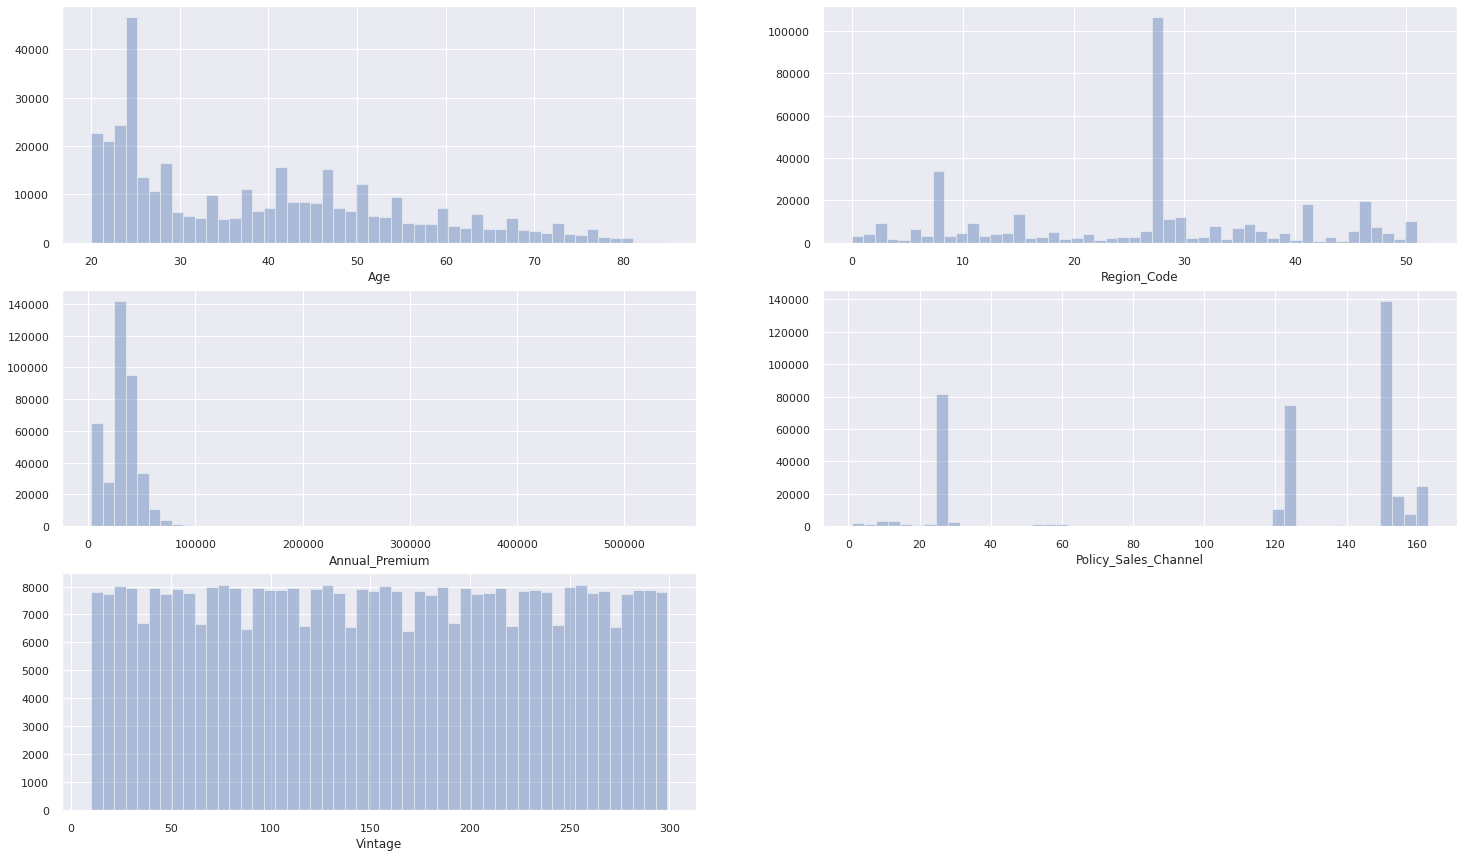

In [27]:
plt.figure(figsize = (25,20))
sns.set(color_codes = True)

plt.subplot(4,2,1)
sns.distplot(df['Age'], kde = False)

plt.subplot(4,2,2)
sns.distplot(df['Region_Code'], kde = False)

plt.subplot(4,2,3)
sns.distplot(df['Annual_Premium'], kde = False)

plt.subplot(4,2,4)
sns.distplot(df['Policy_Sales_Channel'], kde = False)

plt.subplot(4,2,5)
sns.distplot(df['Vintage'], kde = False)

#### Looking at our boxplots, we can see that most of the variables do not have outliers, the only one that does is Annual Premium, for the moment we are not going to remove this data.

<AxesSubplot:title={'center':'Boxplot Age'}, xlabel='Age'>

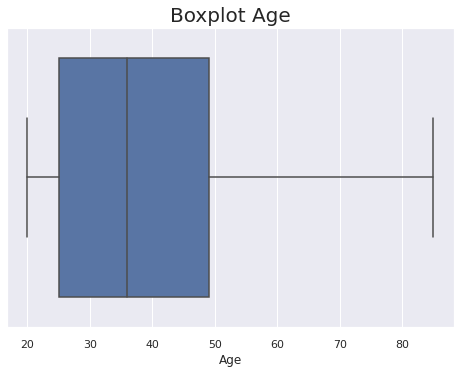

In [34]:
plt.title("Boxplot Age", fontdict = {'fontsize': 20})
sns.boxplot(x=df["Age"])

<AxesSubplot:title={'center':'Boxplot Region_Code'}, xlabel='Region_Code'>

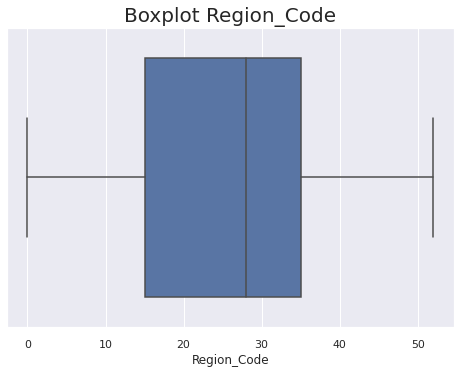

In [35]:
plt.title("Boxplot Region_Code", fontdict = {'fontsize': 20})
sns.boxplot(x=df["Region_Code"])

<AxesSubplot:title={'center':'Boxplot Annual Premium'}, xlabel='Annual_Premium'>

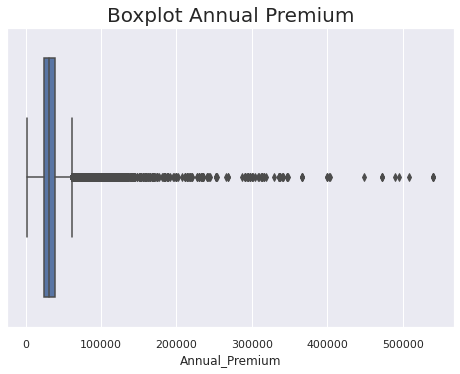

In [36]:
plt.title("Boxplot Annual Premium", fontdict = {'fontsize': 20})
sns.boxplot(x=df["Annual_Premium"])

<AxesSubplot:title={'center':'Boxplot Policy Sales Channel'}, xlabel='Policy_Sales_Channel'>

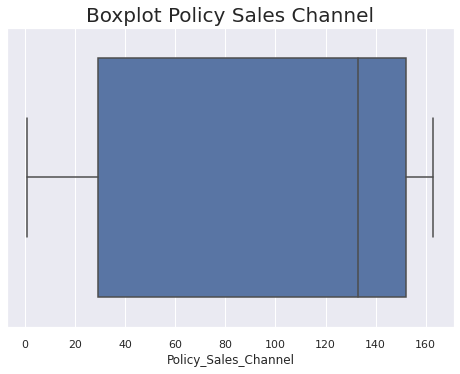

In [37]:
plt.title("Boxplot Policy Sales Channel", fontdict = {'fontsize': 20})
sns.boxplot(x=df["Policy_Sales_Channel"])

<AxesSubplot:title={'center':'Boxplot Vintage'}, xlabel='Vintage'>

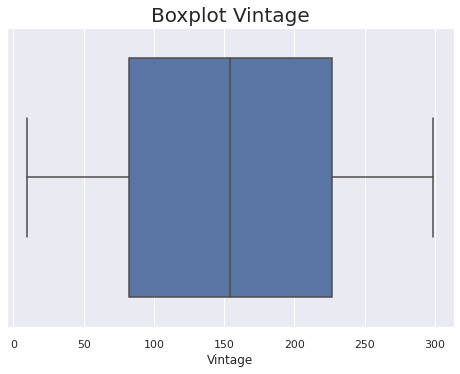

In [38]:
plt.title("Boxplot Vintage", fontdict = {'fontsize': 20})
sns.boxplot(x=df["Vintage"])

#### Bivariate Analysis

#### When we look at our Target variable, the Gender variable has the same distribution, a very important view is that when we look at the customers who want insurance generally weren't Previously Insured or who had Vehicle Damaged, when we look at the Car Age variable , we were able to see that despite having practically the same amount of data for cars aged 1 to 2 years and less than 1 year, cars aged 1 to 2 years are more likely to want insurance, when we look at our continuous variables, they has practically the same distribution, minus the Age variable, when we look we can predict that the older the person, the more likely they are to want insurance.

<AxesSubplot:xlabel='Vintage', ylabel='Density'>

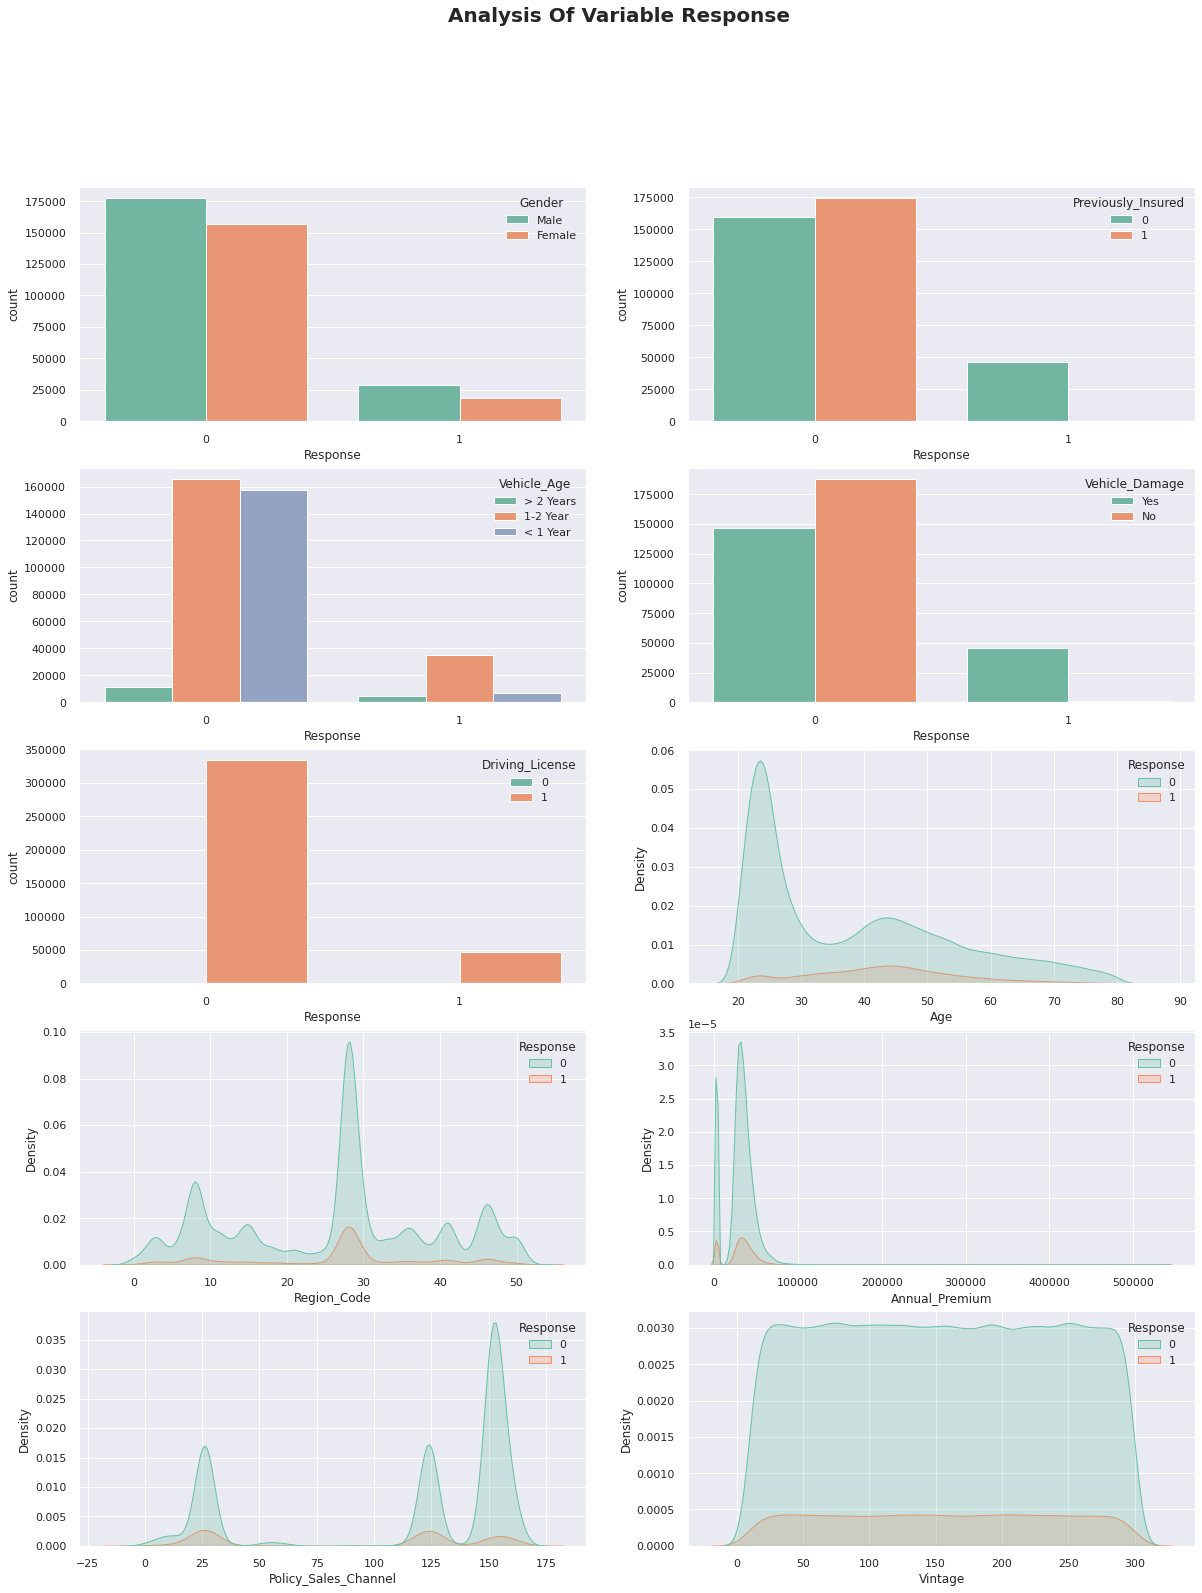

In [77]:
plt.figure(figsize = (20, 25))
plt.suptitle("Analysis Of Variable Response",fontweight="bold", fontsize=20)

plt.subplot(5,2,1)
sns.countplot(x = 'Response', hue = 'Gender', palette = 'Set2', data = df)

plt.subplot(5,2,2)
sns.countplot(x = 'Response', hue = 'Previously_Insured', palette = 'Set2', data = df)

plt.subplot(5,2,3)
sns.countplot(x = 'Response', hue = 'Vehicle_Age', palette = 'Set2', data = df)

plt.subplot(5,2,4)
sns.countplot(x = 'Response', hue = 'Vehicle_Damage', palette = 'Set2', data = df)

plt.subplot(5,2,5)
sns.countplot(x = 'Response', hue = 'Driving_License', palette = 'Set2', data = df)

plt.subplot(5,2,6)
sns.kdeplot(x='Age', hue='Response', palette = 'Set2', shade=True, data=df)

plt.subplot(5,2,7)
sns.kdeplot(x='Region_Code', hue='Response', palette = 'Set2', shade=True, data=df)

plt.subplot(5,2,8)
sns.kdeplot(x='Annual_Premium', hue='Response', palette = 'Set2', shade=True, data=df)

plt.subplot(5,2,9)
sns.kdeplot(x='Policy_Sales_Channel', hue='Response', palette = 'Set2', shade=True, data=df)

plt.subplot(5,2,10)
sns.kdeplot(x='Vintage', hue='Response', palette = 'Set2', shade=True, data=df)

#### Looking deeper into our Previously Insured variable after verifying that virtually all people who want insurance were not Previously Insured, we can see that cars older than 2 years were not Previously Insured, practically all data did not have the car damaged, when we look the peak of the age variable, we can see that we have a small difference between the yes and no values, the yes values ​​have a peak at younger ages and the no values ​​have two peaks, between the youngest age and between 40-50 years, when we look at the other variables we have practically the same distribution.

<AxesSubplot:xlabel='Vintage', ylabel='Density'>

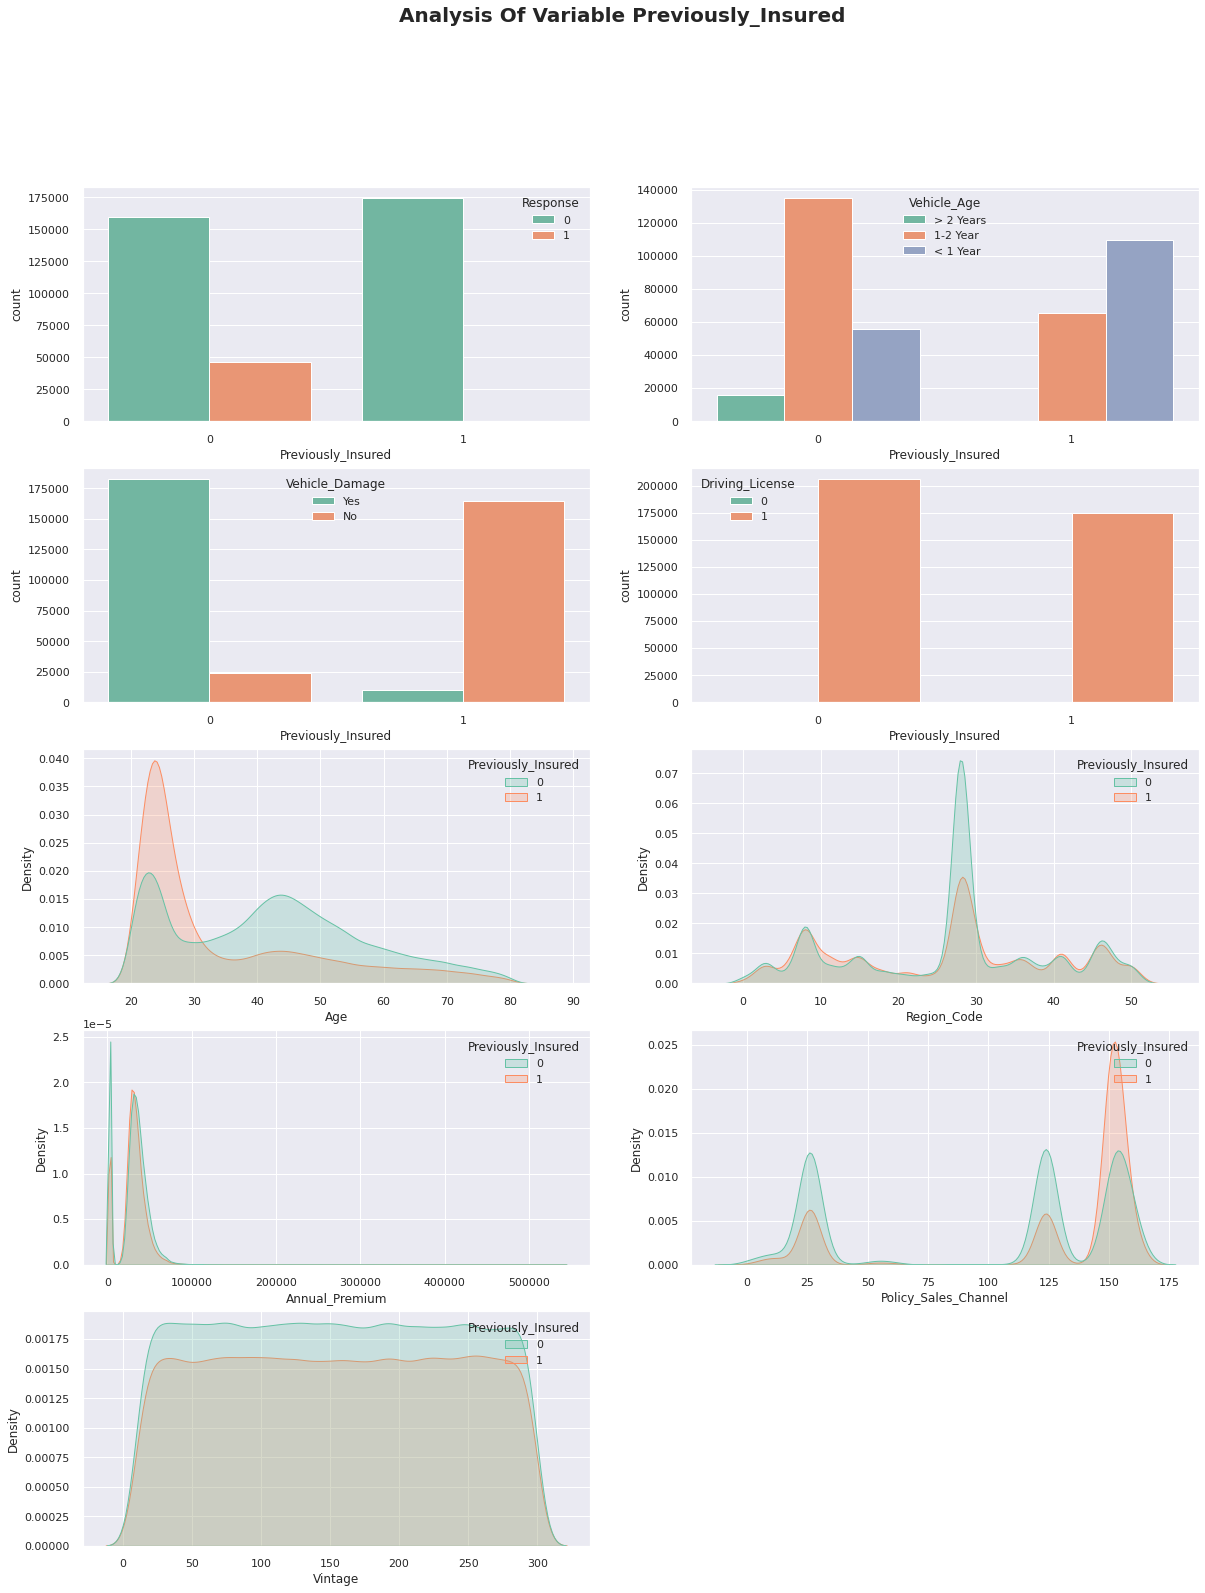

In [78]:
plt.figure(figsize = (20, 25))
plt.suptitle("Analysis Of Variable Previously_Insured",fontweight="bold", fontsize=20)

plt.subplot(5,2,1)
sns.countplot(x = 'Previously_Insured', hue = 'Response', palette = 'Set2', data = df)

plt.subplot(5,2,2)
sns.countplot(x = 'Previously_Insured', hue = 'Vehicle_Age', palette = 'Set2', data = df)

plt.subplot(5,2,3)
sns.countplot(x = 'Previously_Insured', hue = 'Vehicle_Damage', palette = 'Set2', data = df)

plt.subplot(5,2,4)
sns.countplot(x = 'Previously_Insured', hue = 'Driving_License', palette = 'Set2', data = df)

plt.subplot(5,2,5)
sns.kdeplot(x='Age', hue='Previously_Insured', palette = 'Set2', shade=True, data=df)

plt.subplot(5,2,6)
sns.kdeplot(x='Region_Code', hue='Previously_Insured', palette = 'Set2', shade=True, data=df)

plt.subplot(5,2,7)
sns.kdeplot(x='Annual_Premium', hue='Previously_Insured', palette = 'Set2', shade=True, data=df)

plt.subplot(5,2,8)
sns.kdeplot(x='Policy_Sales_Channel', hue='Previously_Insured', palette = 'Set2', shade=True, data=df)

plt.subplot(5,2,9)
sns.kdeplot(x='Vintage', hue='Previously_Insured', palette = 'Set2', shade=True, data=df)

#### Looking at our Vehicle Damaged variable Further after verifying that practically all people who want insurance had their car previously damaged, we can see that practically all cars older than 2 years have already been damaged, and when we look at the undamaged cars, we have a large volume of new cars, which makes a lot of sense, a very interesting thing to look at is that when we compare the variable Previously Insured and Vehicle Damage we can see that most of the cars that have already been damaged were not Previously Insured and most of non-damaged cars were Previously Insured, another interesting thing is when we look at the age variable, the younger ones did not have a damaged vehicle and between 40-50 years old did, when we look at the other continuous variables we had practically the same distribution.

<AxesSubplot:xlabel='Vintage', ylabel='Density'>

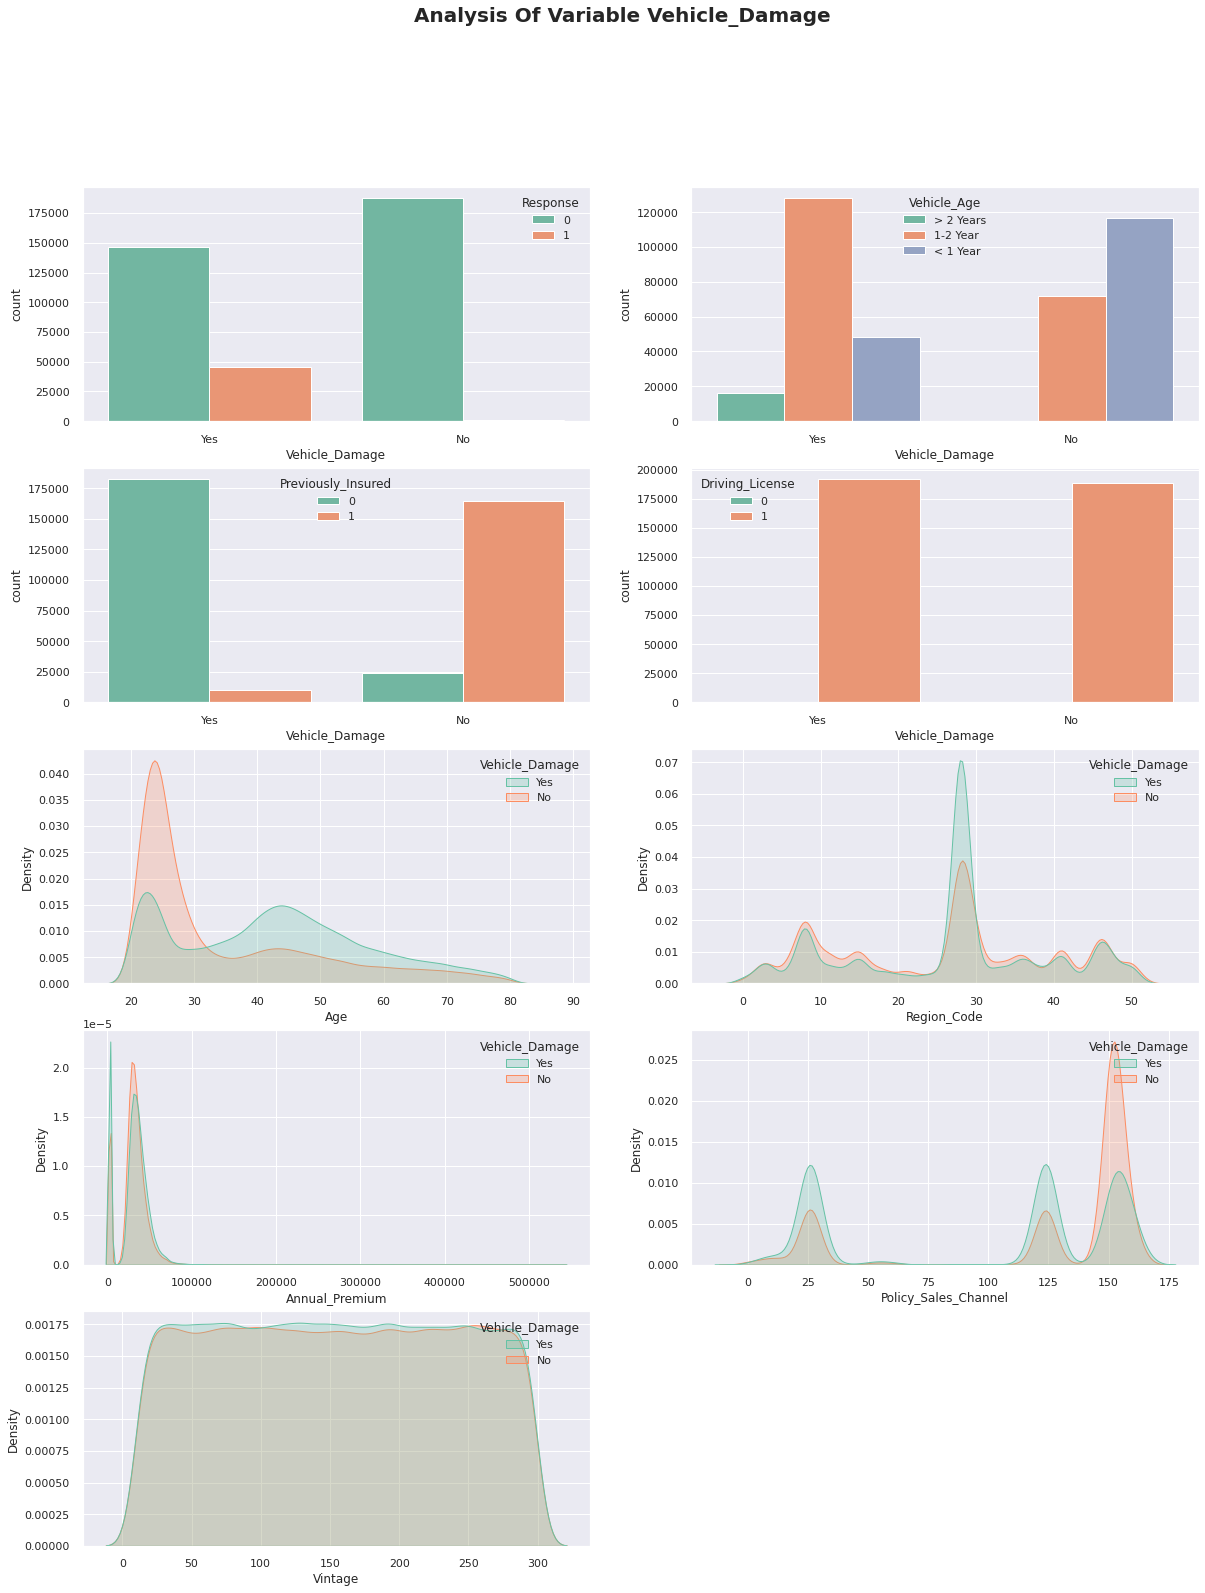

In [79]:
plt.figure(figsize = (20, 25))
plt.suptitle("Analysis Of Variable Vehicle_Damage",fontweight="bold", fontsize=20)

plt.subplot(5,2,1)
sns.countplot(x = 'Vehicle_Damage', hue = 'Response', palette = 'Set2', data = df)

plt.subplot(5,2,2)
sns.countplot(x = 'Vehicle_Damage', hue = 'Vehicle_Age', palette = 'Set2', data = df)

plt.subplot(5,2,3)
sns.countplot(x = 'Vehicle_Damage', hue = 'Previously_Insured', palette = 'Set2', data = df)

plt.subplot(5,2,4)
sns.countplot(x = 'Vehicle_Damage', hue = 'Driving_License', palette = 'Set2', data = df)

plt.subplot(5,2,5)
sns.kdeplot(x='Age', hue='Vehicle_Damage', palette = 'Set2', shade=True, data=df)

plt.subplot(5,2,6)
sns.kdeplot(x='Region_Code', hue='Vehicle_Damage', palette = 'Set2', shade=True, data=df)

plt.subplot(5,2,7)
sns.kdeplot(x='Annual_Premium', hue='Vehicle_Damage', palette = 'Set2', shade=True, data=df)

plt.subplot(5,2,8)
sns.kdeplot(x='Policy_Sales_Channel', hue='Vehicle_Damage', palette = 'Set2', shade=True, data=df)

plt.subplot(5,2,9)
sns.kdeplot(x='Vintage', hue='Vehicle_Damage', palette = 'Set2', shade=True, data=df)

## <font color='blue'> 3. Model Building. </font>


#### Here we will remove the ID variable that will not be used

In [3]:
df = df.drop('id', axis = 1)

In [4]:
df_test = df_test.drop('id', axis = 1)

In [5]:
answer = answer.drop('id', axis = 1)

#### Separating into features variables and target variable.

In [6]:
X = df.drop('Response', axis = 1)

In [7]:
X = X.values

In [8]:
y = df['Response']

#### Balancing Classes

#### As we have many values ​​of a class and few values ​​of others, we will balance the classes using OverSampling to make the classes balanced.

In [9]:
from imblearn.over_sampling import RandomOverSampler

In [10]:
ros = RandomOverSampler(random_state=0)

In [11]:
X, y = ros.fit_resample(X, y)

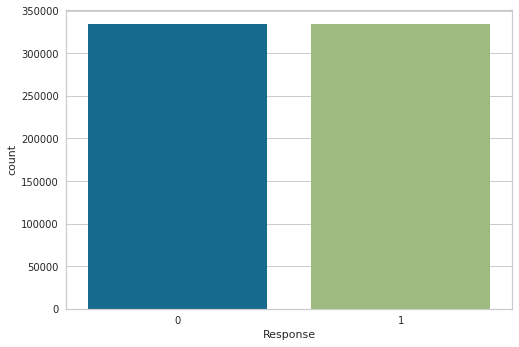

In [12]:
ax = sns.countplot(x=y)

#### Label Encoder

#### Here we are going to use the LabelEncoder to transform our categorical variables into numeric variables.

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
label_encoder_gender = LabelEncoder()
label_encoder_Driving_License = LabelEncoder()
label_encoder_Previously_Insured = LabelEncoder()
label_encoder_Vehicle_Age = LabelEncoder()
label_encoder_Vehicle_Damage = LabelEncoder()

In [15]:
X[:,0] = label_encoder_gender.fit_transform(X[:,0])
X[:,2] = label_encoder_Driving_License.fit_transform(X[:,2])
X[:,4] = label_encoder_Previously_Insured.fit_transform(X[:,4])
X[:,5] = label_encoder_Vehicle_Age.fit_transform(X[:,5])
X[:,6] = label_encoder_Vehicle_Damage.fit_transform(X[:,6])

#### StandardScaler

#### Here we will use StandardScaler to put our data in the same scale.

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_standard = scaler.fit_transform(X)

#### Transforming Data into Train e Test, here we will use 30% of our data to test the machine learning models.

In [83]:
from sklearn.model_selection import train_test_split

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X_standard, y, test_size = 0.3, random_state = 0)

#### Naive Bayes

#### Running Gaussian Model.

#### Here we will use the Naive Bayes Model, we will test Gaussian model, using our Normal Data.

In [22]:
from sklearn.naive_bayes import GaussianNB

In [23]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

GaussianNB()

In [24]:
previsoes = naive_bayes.predict(X_test)

#### Result

0.7839413875598086

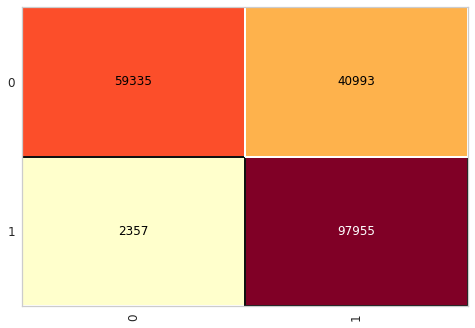

In [25]:
cm = ConfusionMatrix(naive_bayes)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [26]:
classification_naive_gaussian = (classification_report(y_test, previsoes))

In [27]:
print(classification_naive_gaussian)

              precision    recall  f1-score   support

           0       0.96      0.59      0.73    100328
           1       0.70      0.98      0.82    100312

    accuracy                           0.78    200640
   macro avg       0.83      0.78      0.78    200640
weighted avg       0.83      0.78      0.78    200640



#### We had 78% accuracy, it's not a bad model but it's not a good model either, it was very good at predicting positive results but not very good at predicting negative results.

In [38]:
score_naive_gaussian = 0.7839413875598086

#### Decision Tree

#### Here we will use the Decision Tree Model, we will test Entropy and Gini calculations.

#### Applying GridSearch

#### Here we are applying GridSearch to check which are the best metrics to use.

In [29]:
min_split = np.array([2, 3, 4, 5, 6, 7])
max_nvl = np.array([3, 4, 5, 6, 7, 9, 11])
alg = ['entropy', 'gini']
values_grid = {'min_samples_split': min_split, 'max_depth': max_nvl, 'criterion': alg}

In [30]:
model = DecisionTreeClassifier()

In [31]:
gridDecisionTree = GridSearchCV(estimator = model, param_grid = values_grid, cv = 5)

In [32]:
gridDecisionTree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': array([ 3,  4,  5,  6,  7,  9, 11]),
                         'min_samples_split': array([2, 3, 4, 5, 6, 7])})

#### Decision Tree - GridSearch

In [33]:
print('Mín Split: ', gridDecisionTree.best_estimator_.min_samples_split)
print('Max Nvl: ', gridDecisionTree.best_estimator_.max_depth)
print('Algorithm: ', gridDecisionTree.best_estimator_.criterion)
print('Score: ', gridDecisionTree.best_score_)

Mín Split:  2
Max Nvl:  11
Algorithm:  gini
Score:  0.801473004844653


#### Running Decision Tree.

In [85]:
decision_tree = DecisionTreeClassifier(criterion = 'gini', min_samples_split = 2, max_depth= 11, random_state=0)

In [86]:
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=11, random_state=0)

In [87]:
previsoes = decision_tree.predict(X_test)

#### Result

0.8007027511961723

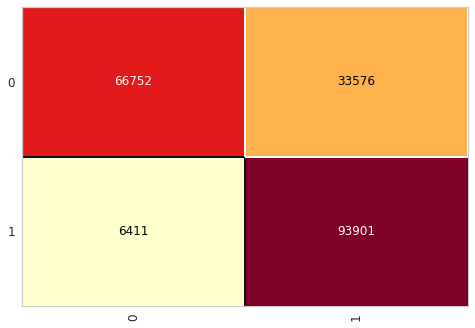

In [88]:
cm = ConfusionMatrix(decision_tree)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [89]:
classification_decision = (classification_report(y_test, previsoes))

In [90]:
print(classification_decision)

              precision    recall  f1-score   support

           0       0.91      0.67      0.77    100328
           1       0.74      0.94      0.82    100312

    accuracy                           0.80    200640
   macro avg       0.82      0.80      0.80    200640
weighted avg       0.82      0.80      0.80    200640



#### We had an improvement when compared to the Naive Bayes model but here we have the same situation.

In [91]:
score_tree = 0.8007027511961723

#### Checking the most important variables of the model

In [92]:
columns = df.drop('Response', axis = 1).columns

In [93]:
feature_imp = pd.Series(decision_tree.feature_importances_, index = columns).sort_values(ascending = False)

In [94]:
feature_imp

Vehicle_Damage          0.778177
Age                     0.076362
Previously_Insured      0.072265
Policy_Sales_Channel    0.032619
Annual_Premium          0.012272
Region_Code             0.011548
Vintage                 0.008916
Vehicle_Age             0.004556
Gender                  0.002733
Driving_License         0.000554
dtype: float64

#### Random Forest

#### Here we will use the Random Forest Model, we will test Entropy and Gini calculations.

In [95]:
from sklearn.ensemble import RandomForestClassifier

#### Applying GridSearch

In [45]:
n_estimators = np.array([100])
alg = ['entropy', 'gini']
values_grid = {'n_estimators': n_estimators, 'criterion': alg}

In [46]:
model = RandomForestClassifier()

In [47]:
gridRandomForest = GridSearchCV(estimator = model, param_grid = values_grid, cv = 5)

In [48]:
gridRandomForest.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'n_estimators': array([100])})

#### Random Forest - GridSearch

In [49]:
print('Algorithm: ', gridRandomForest.best_estimator_.criterion)
print('Score: ', gridRandomForest.best_score_)

Algorithm:  gini
Score:  0.9231370616716397


#### Running Random Forest

In [96]:
random_forest = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)

In [97]:
random_forest.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [98]:
previsoes = random_forest.predict(X_test)

#### Result

0.938033293460925

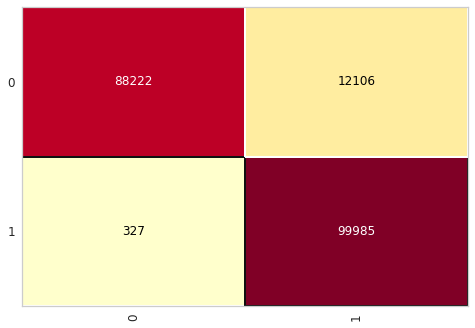

In [99]:
cm = ConfusionMatrix(random_forest)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [100]:
classification_random = (classification_report(y_test, previsoes))

In [101]:
print(classification_random)

              precision    recall  f1-score   support

           0       1.00      0.88      0.93    100328
           1       0.89      1.00      0.94    100312

    accuracy                           0.94    200640
   macro avg       0.94      0.94      0.94    200640
weighted avg       0.94      0.94      0.94    200640



#### Now we have a great model, although the model is much better at predicting positive values, it ended up improving a lot at predicting negative values, we had almost 94% accuracy.

In [102]:
score_random = 0.938033293460925

#### Checking the most important variables of the model

In [103]:
feature_imp_random = pd.Series(random_forest.feature_importances_, index = columns).sort_values(ascending = False)

In [104]:
feature_imp_random

Vintage                 0.213535
Annual_Premium          0.188137
Previously_Insured      0.168692
Vehicle_Damage          0.143217
Age                     0.119446
Region_Code             0.085400
Policy_Sales_Channel    0.058970
Vehicle_Age             0.013198
Gender                  0.008816
Driving_License         0.000587
dtype: float64

#### Extra Trees

#### Here we will use the Extra Trees Model, we will test Entropy and Gini calculations.

In [105]:
from sklearn.ensemble import ExtraTreesClassifier

#### Applying GridSearch

In [60]:
n_estimators = np.array([100])
alg = ['entropy', 'gini']
values_grid = {'n_estimators': n_estimators, 'criterion': alg}

In [61]:
model = ExtraTreesClassifier()

In [62]:
gridExtraTrees = GridSearchCV(estimator = model, param_grid = values_grid, cv = 5)

In [63]:
gridExtraTrees.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'n_estimators': array([100])})

#### ExtraTrees - GridSearch

In [68]:
print('Algorithm: ', gridExtraTrees.best_estimator_.criterion)
print('Score: ', gridExtraTrees.best_score_)

Algorithm:  gini
Score:  0.9469217673834489


#### Running Extra Trees

In [106]:
extra_trees = ExtraTreesClassifier(n_estimators = 100, criterion = 'gini', random_state = 0)

In [107]:
extra_trees.fit(X_train, y_train)

ExtraTreesClassifier(random_state=0)

In [108]:
previsoes = extra_trees.predict(X_test)

#### Result

0.9623255582137161

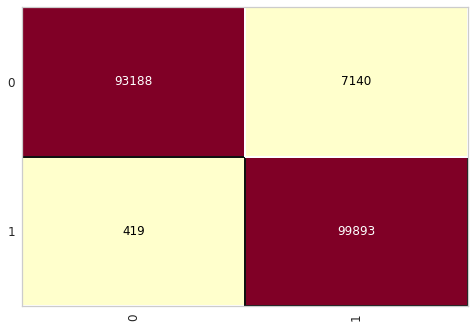

In [109]:
cm = ConfusionMatrix(extra_trees)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [110]:
classification_extra = (classification_report(y_test, previsoes))

In [111]:
print(classification_extra)

              precision    recall  f1-score   support

           0       1.00      0.93      0.96    100328
           1       0.93      1.00      0.96    100312

    accuracy                           0.96    200640
   macro avg       0.96      0.96      0.96    200640
weighted avg       0.96      0.96      0.96    200640



#### Using the Extra Trees model we had the best performance, I think it is difficult that we will have a better model than this one, it was a model that managed to predict both values ​​very well, we had 96% accuracy.

In [112]:
score_extra = 0.9623255582137161

#### Checking the most important variables of the model

In [113]:
feature_extra = pd.Series(extra_trees.feature_importances_, index = columns).sort_values(ascending = False)

In [114]:
feature_extra

Vehicle_Damage          0.209716
Vintage                 0.185167
Annual_Premium          0.160338
Previously_Insured      0.156567
Age                     0.116542
Region_Code             0.083248
Policy_Sales_Channel    0.062828
Vehicle_Age             0.019646
Gender                  0.005304
Driving_License         0.000645
dtype: float64

#### K Means

#### Here we will use the K Means Model.

In [78]:
from sklearn.cluster import KMeans

In [79]:
model = KMeans(n_clusters = 2, random_state=16)

In [80]:
model.fit(X_train)

KMeans(n_clusters=2, random_state=16)

In [81]:
previsoes = model.predict(X_test)

#### Result

In [82]:
classification_kmeans_standard = (accuracy_score(y_test, previsoes))

#### Probably the worst model, he couldn't learn practically anything.

In [83]:
classification_kmeans_standard

0.23505283094098883

In [43]:
score_kmeans = 0.23505283094098883

#### K Neighbors

#### Here we will use the K-Neighbors Model, we will use the GridSearch Model to figure out the best metrics to use in this model.

In [84]:
from sklearn.neighbors import KNeighborsClassifier

In [85]:
knn = KNeighborsClassifier()

#### Here we use the GridSearch to figure out the best metrics to use in this model.

In [86]:
k_list = list(range(1,10))

In [87]:
k_values = dict(n_neighbors = k_list)

In [88]:
grid = GridSearchCV(knn, k_values, cv = 2, scoring = 'accuracy', n_jobs = -1)

In [89]:
grid.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
             scoring='accuracy')

#### KNN - GridSearch

In [90]:
grid.best_params_, grid.best_score_

({'n_neighbors': 1}, 0.8874845671760389)

#### Running K Neighbors

In [91]:
knn = KNeighborsClassifier(n_neighbors = 1, metric = 'minkowski', p = 2)

In [92]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [93]:
previsoes = knn.predict(X_test)

#### Result

0.9341606858054227

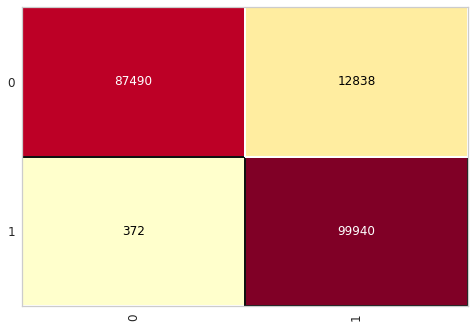

In [94]:
cm = ConfusionMatrix(knn)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [95]:
classification_knn = (classification_report(y_test, previsoes))

In [96]:
print(classification_knn)

              precision    recall  f1-score   support

           0       1.00      0.87      0.93    100328
           1       0.89      1.00      0.94    100312

    accuracy                           0.93    200640
   macro avg       0.94      0.93      0.93    200640
weighted avg       0.94      0.93      0.93    200640



#### We had a great model here using KNN, but compared to the Extra Tree model it is still inferior.

In [127]:
score_knn = 0.9341606858054227

#### Logistic Regression

In [98]:
from sklearn.linear_model import LogisticRegression

In [99]:
logistic = LogisticRegression(random_state = 1, max_iter=1000)

In [100]:
logistic.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=1)

In [101]:
previsoes = logistic.predict(X_test)

#### Result

0.7839413875598086

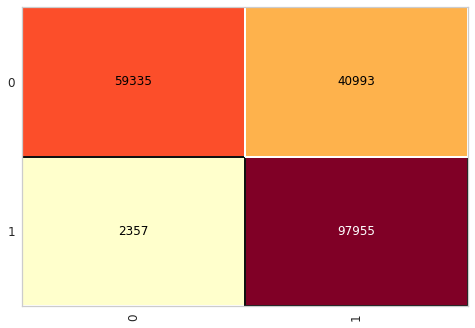

In [102]:
cm = ConfusionMatrix(logistic)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [103]:
logistic_normal = (classification_report(y_test, previsoes))

In [104]:
print(logistic_normal)

              precision    recall  f1-score   support

           0       0.96      0.59      0.73    100328
           1       0.70      0.98      0.82    100312

    accuracy                           0.78    200640
   macro avg       0.83      0.78      0.78    200640
weighted avg       0.83      0.78      0.78    200640



#### It managed to learn the positive values ​​but failed to predict the negative values.

In [44]:
logistic_normal = 0.7839413875598086

#### Ada Boost

#### Here we will use the AdaBoost Model, we will use the GridSearch Model to figure out the best metrics to use in this model.

In [19]:
from sklearn.ensemble import AdaBoostClassifier

#### Applying GridSearch

In [20]:
n_estimators = np.array([500])
learning_rate = np.array([1.0, 1.1, 1.5, 1.7, 0.5, 0.4])
values_grid = {'n_estimators': n_estimators, 'learning_rate': learning_rate}

In [21]:
model = AdaBoostClassifier()

In [22]:
gridAdaBoost = GridSearchCV(estimator = model, param_grid = values_grid, cv = 5, n_jobs = -1)

In [23]:
gridAdaBoost.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': array([1. , 1.1, 1.5, 1.7, 0.5, 0.4]),
                         'n_estimators': array([500])})

#### AdaBoost - Grid

In [24]:
print('Learning Rate: ', gridAdaBoost.best_estimator_.learning_rate)
print('Score: ', gridAdaBoost.best_score_)

Learning Rate:  1.5
Score:  0.7994971769470217


#### Running AdaBoost

In [25]:
ada_boost = AdaBoostClassifier(n_estimators = 500, learning_rate = 1.5, random_state = 0)

In [26]:
ada_boost.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=1.5, n_estimators=500, random_state=0)

In [27]:
previsoes = ada_boost.predict(X_test)

#### Result

0.7985297049441786

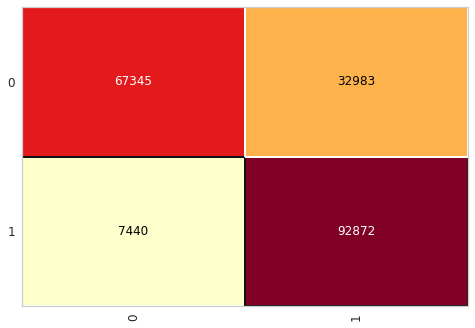

In [28]:
cm = ConfusionMatrix(ada_boost)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [29]:
classification_ada_scaler = (classification_report(y_test, previsoes))

In [30]:
print(classification_ada_scaler)

              precision    recall  f1-score   support

           0       0.90      0.67      0.77    100328
           1       0.74      0.93      0.82    100312

    accuracy                           0.80    200640
   macro avg       0.82      0.80      0.80    200640
weighted avg       0.82      0.80      0.80    200640



#### It managed to learn the positive values ​​but failed to predict the negative values.

In [45]:
score_ada_scaler = 0.7985297049441786

#### Gradient Boosting

In [32]:
from sklearn.ensemble import GradientBoostingClassifier

#### Here we will use the Gradient Boosting Model, here we will use the GridSearch Model to figure out the best metrics to use in this model.

In [33]:
n_estimators = np.array([300])
learning_rate = np.array([0.01, 0.009, 0.008, 0.007, 0.001, 0.002, 0.003, 0.004, 0.005])
values_grid = {'n_estimators': n_estimators, 'learning_rate': learning_rate}

In [34]:
model = GradientBoostingClassifier()

In [35]:
gridGradient = GridSearchCV(estimator = model, param_grid = values_grid, cv = 5, n_jobs = -1)

In [36]:
gridGradient.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': array([0.01 , 0.009, 0.008, 0.007, 0.001, 0.002, 0.003, 0.004, 0.005]),
                         'n_estimators': array([300])})

#### Gradient - GridSearch

In [37]:
print('Learning Rate: ', gridGradient.best_estimator_.learning_rate)
print('Score: ', gridGradient.best_score_)

Learning Rate:  0.009
Score:  0.7931617114338609


In [46]:
grad_boost = GradientBoostingClassifier(n_estimators = 300, learning_rate = 0.009, random_state = 0)

In [47]:
grad_boost.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.009, n_estimators=300,
                           random_state=0)

In [48]:
previsoes = grad_boost.predict(X_test)

#### Result

0.7921251993620415

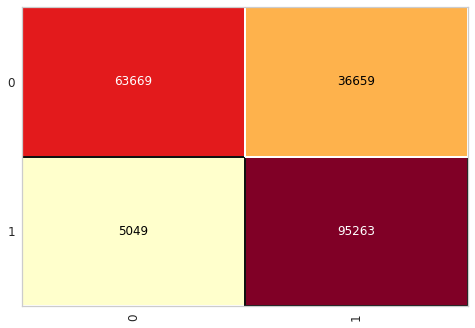

In [49]:
cm = ConfusionMatrix(grad_boost)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [50]:
classification_grad_standard = (classification_report(y_test, previsoes))

In [51]:
print(classification_grad_standard)

              precision    recall  f1-score   support

           0       0.93      0.63      0.75    100328
           1       0.72      0.95      0.82    100312

    accuracy                           0.79    200640
   macro avg       0.82      0.79      0.79    200640
weighted avg       0.82      0.79      0.79    200640



#### It managed to learn the positive values ​​but failed to predict the negative values.

In [53]:
score_grad_standard = 0.7921251993620415

#### Neural Network

In [54]:
from keras.utils import np_utils

In [55]:
y_convert = np_utils.to_categorical(y)

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X_standard, y_convert, test_size = 0.3, random_state = 0)

In [70]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential()
model.add(Dense(10, input_dim = 10, kernel_initializer = 'normal', activation = 'relu'))
model.add(Dense(10, kernel_initializer = 'normal', activation = 'relu'))
model.add(Dense(2, kernel_initializer = 'normal', activation = 'softmax'))

from tensorflow.keras.optimizers import Adam
optimitzer = Adam(amsgrad=True)

model.compile(loss='categorical_crossentropy', optimizer = optimitzer, metrics=['acc'])

In [77]:
model.fit(X_train, y_train, epochs = 100, batch_size = 80000, validation_data = (X_test, y_test), verbose = 1)

Epoch 1/100
6/6 [==============================] - 0s 49ms/step - loss: 0.4254 - acc: 0.7954 - val_loss: 0.4280 - val_acc: 0.7940
Epoch 2/100
6/6 [==============================] - 0s 38ms/step - loss: 0.4254 - acc: 0.7953 - val_loss: 0.4280 - val_acc: 0.7939
Epoch 3/100
6/6 [==============================] - 0s 38ms/step - loss: 0.4254 - acc: 0.7953 - val_loss: 0.4280 - val_acc: 0.7940
Epoch 4/100
6/6 [==============================] - 0s 37ms/step - loss: 0.4254 - acc: 0.7954 - val_loss: 0.4280 - val_acc: 0.7941
Epoch 5/100
6/6 [==============================] - 0s 38ms/step - loss: 0.4254 - acc: 0.7952 - val_loss: 0.4280 - val_acc: 0.7939
Epoch 6/100
6/6 [==============================] - 0s 38ms/step - loss: 0.4254 - acc: 0.7953 - val_loss: 0.4280 - val_acc: 0.7941
Epoch 7/100
6/6 [==============================] - 0s 38ms/step - loss: 0.4254 - acc: 0.7954 - val_loss: 0.4280 - val_acc: 0.7941
Epoch 8/100
6/6 [==============================] - 0s 39ms/step - loss: 0.4254 - acc: 0.79

#### The neural network model did not achieve such a good result.

In [78]:
score_neural_network = 0.7953

#### Checking key variables to predict the outcome.

#### CHI - 2

In [115]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

features = X
target = y

best_features = SelectKBest(score_func = chi2,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(columns),columns = ['Chi Squared Score']) 

In [117]:
featureScores.sort_values(by = 'Chi Squared Score', ascending = False).round(3)

,Chi Squared Score
Annual_Premium,8307790.298
Policy_Sales_Channel,853732.060
Previously_Insured,171058.965
Age,114291.103
Vehicle_Damage,68901.004
Vehicle_Age,12897.699
Gender,1916.881
Region_Code,1255.946
Vintage,181.884
Driving_License,0.354


#### Decision Tree

In [118]:
feature_imp

Vehicle_Damage          0.778177
Age                     0.076362
Previously_Insured      0.072265
Policy_Sales_Channel    0.032619
Annual_Premium          0.012272
Region_Code             0.011548
Vintage                 0.008916
Vehicle_Age             0.004556
Gender                  0.002733
Driving_License         0.000554
dtype: float64

#### Random Forest

In [120]:
feature_imp_random

Vintage                 0.213535
Annual_Premium          0.188137
Previously_Insured      0.168692
Vehicle_Damage          0.143217
Age                     0.119446
Region_Code             0.085400
Policy_Sales_Channel    0.058970
Vehicle_Age             0.013198
Gender                  0.008816
Driving_License         0.000587
dtype: float64

#### Extra Trees

In [122]:
feature_extra

Vehicle_Damage          0.209716
Vintage                 0.185167
Annual_Premium          0.160338
Previously_Insured      0.156567
Age                     0.116542
Region_Code             0.083248
Policy_Sales_Channel    0.062828
Vehicle_Age             0.019646
Gender                  0.005304
Driving_License         0.000645
dtype: float64

#### Checking the results.

In [123]:
Naive_dict_v1 = {'Model':'Naive Bayes',
               'Scaling':'Normal Data',
               'Type':'Gaussian',
               'Precision':score_naive_gaussian}

resumo = pd.DataFrame({'Naive_dict_v1':pd.Series(Naive_dict_v1),
                      })

In [125]:
Decision_dict = {'Model':'Decision Tree',
               'Scaling':'Normal Data',
               'Type': 'Gini',
               'Precision':score_tree}

Random_dict = {'Model':'Random Forest',
               'Scaling':'Normal Data',
               'Type': 'Gini',
               'Precision':score_random}

Extra_dict = {'Model':'Extra Trees',
               'Scaling':'Normal Data',
               'Type': 'Gini',
               'Precision':score_extra}

resumo_random = pd.DataFrame({'Decision_dict':pd.Series(Decision_dict),
                        'Random_dict':pd.Series(Random_dict),
                        'Extra Tree':pd.Series(Extra_dict)
                      })

In [129]:
K_Means_dict_v2 = {'Model':'Means',
               'Scaling':'Standard',
               'Type':'-',
               'Precision':score_kmeans}

resumo_k_means = pd.DataFrame({'K_Means_dict_v2':pd.Series(K_Means_dict_v2)
                      })

In [130]:
KNN_dict_v2 = {'Model':'KNN',
               'Scaling':'Standard',
               'Type':'-',
               'Precision':score_knn}

resumo_knn = pd.DataFrame({'KNN_dict_v2':pd.Series(KNN_dict_v2)
                      })

In [131]:
Logistic_dict_v1 = {'Model':'Logistic Regression',
               'Scaling':'Normal Data',
               'Type':'-',
               'Precision':logistic_normal}

resumo_logistic = pd.DataFrame({'Logistic_dict_v1':pd.Series(Logistic_dict_v1)
                      })

In [133]:
ada_dict_v1 = {'Model':'AdaBoost',
               'Scaling':'StandardScaler',
               'Type':'-',
               'Precision':score_ada_scaler}

resumo_ada = pd.DataFrame({'ada_dict_v1':pd.Series(ada_dict_v1)
                      })

In [134]:
grad_dict_v1 = {'Model':'GradientBoost',
               'Scaling':'StandardScaler',
               'Type':'-',
               'Precision':score_grad_standard}

resumo_grad = pd.DataFrame({'grad_dict_v1':pd.Series(grad_dict_v1)
                      })

In [135]:
neural_dict_v1 = {'Model':'Neural Network',
               'Scaling':'StandardScaler',
               'Type':'-',
               'Precision':score_neural_network}

resumo_neural = pd.DataFrame({'neural_dict_v1':pd.Series(neural_dict_v1)
                      })

In [136]:
resumo

,Naive_dict_v1
Model,Naive Bayes
Scaling,Normal Data
Type,Gaussian
Precision,0.783941


In [137]:
resumo_random

,Decision_dict,Random_dict,Extra Tree
Model,Decision Tree,Random Forest,Extra Trees
Scaling,Normal Data,Normal Data,Normal Data
Type,Gini,Gini,Gini
Precision,0.800703,0.938033,0.962326


In [138]:
resumo_k_means

,K_Means_dict_v2
Model,Means
Scaling,Standard
Type,-
Precision,0.235053


In [139]:
resumo_knn

,KNN_dict_v2
Model,KNN
Scaling,Standard
Type,-
Precision,0.934161


In [140]:
resumo_logistic

,Logistic_dict_v1
Model,Logistic Regression
Scaling,Normal Data
Type,-
Precision,0.783941


In [142]:
resumo_ada

,ada_dict_v1
Model,AdaBoost
Scaling,StandardScaler
Type,-
Precision,0.79853


In [143]:
resumo_grad

,grad_dict_v1
Model,GradientBoost
Scaling,StandardScaler
Type,-
Precision,0.792125


In [144]:
resumo_neural

,neural_dict_v1
Model,Neural Network
Scaling,StandardScaler
Type,-
Precision,0.7953


## <font color='blue'> 4. Conclusion. </font>


#### We can see that we have numeric variables and some categorical variables, our database is not very big, which makes our work a little difficult.

#### When we look at our database, we can see that we don't have null values ​​which makes our work easier

#### When we look at the correlation part, we see that we do not have a strong correlation between our variables, in the exploratory analysis the two variables that most caught our attention was the Vehicle Damage variable, in which we were able to see that practically all customers who are likely to want insurance are customers who have had problems with their car, another variable that caught our attention was the Previously Insured variable, where practically all data from potential customers are customers who were not Previously Insured, looking at our Previously Insured variable we can see that cars older than 2 years were not Previously Insured, practically all the data did not have the car damaged, Looking at our Vehicle Damaged variable Further after verifying that practically all people who want insurance had their car previously damaged, we can see that practically all cars older than 2 years have already been damaged, and when we look at the undamaged cars, we have a large volume of new cars, which makes a lot of sense, a very interesting thing to look at is that when we compare the variable Previously Insured and Vehicle Damage we can see that most of the cars that have already been damaged were not Previously Insured and most of non-damaged cars were Previously Insured

#### When we look at our target variable, we can see that we have many more no values ​​than yes, which makes it necessary to balance the classes before starting to run the Machine Learning models.

#### Speaking of Machine Learning models, we got several models with good results, some models failed to predict both outputs and other models did very well, our main models were ExtraTrees and Random Forest, but the model that had the best result balanced and with the highest precision value was the Extra Trees model with an accuracy of 97%.

#### When we look at the most important variables for the decision of each model it is funny that we have a lot of different things in each specific model, when we look at our best model we have the Vehicle Damage and Vintage variables as the most important variables, when we look at our Random model Forest we have the variable Vintage and the variable Annual Premium, it is interesting to know that each model found a different variable for the decision.

#### <font color='red'> if you liked the analysis, leave a "like" (up arrow), and comment what you think of the study, if you have any suggestions I would be happy to hear from you... </font>
